In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

Answer the following questions based on data preprocessing, visualization, correlation,
feature engineering, and using any 3 machine learning models for classification of your
choice. (Do not use deep learning models)


#### Explore some of the following research questions:
1) Can survey questions asked from the CDC provide accurate predictions of whether
an individual has diabetes? Do you recommend additional features in the data?
2) What risk factors are most predictive of diabetes risk?
3) Can we use a subset of the risk factors to accurately predict whether an individual
has diabetes?
4) What machine learning models are best for classifying the disease? Compare
models and explain why a model performed better based on the confusion matrix and
minimizing false negatives.


In [43]:
data = pd.read_csv("diabetes_binary_classification_data.csv")
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [44]:
# Splitting data into features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


1) Can survey questions asked from the CDC provide accurate predictions of whether
an individual has diabetes? Do you recommend additional features in the data?


<span style="color: rgb(100, 200, 100);">The data has no missing values, as stated in the A2_task.md "...is a clean dataset of 253,680 survey responses..." we dont need to cleanse the data. Also there are only numerical categories, we don't need to handle categorical features. The CDC survey includes numerous features. Additional factors that could be considered are sleep patterns and family history of diabetes.

In [45]:
# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Fit the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Evaluate the models
print("Logistic Regression")
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

print("Random Forest")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("XGBoost")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Logistic Regression
[[42775   964]
 [ 5840  1157]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

Random Forest
[[42402  1337]
 [ 5778  1219]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

XGBoost
[[42763   976]
 [ 5784  1213]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.26      6997

    accuracy                           0.87    

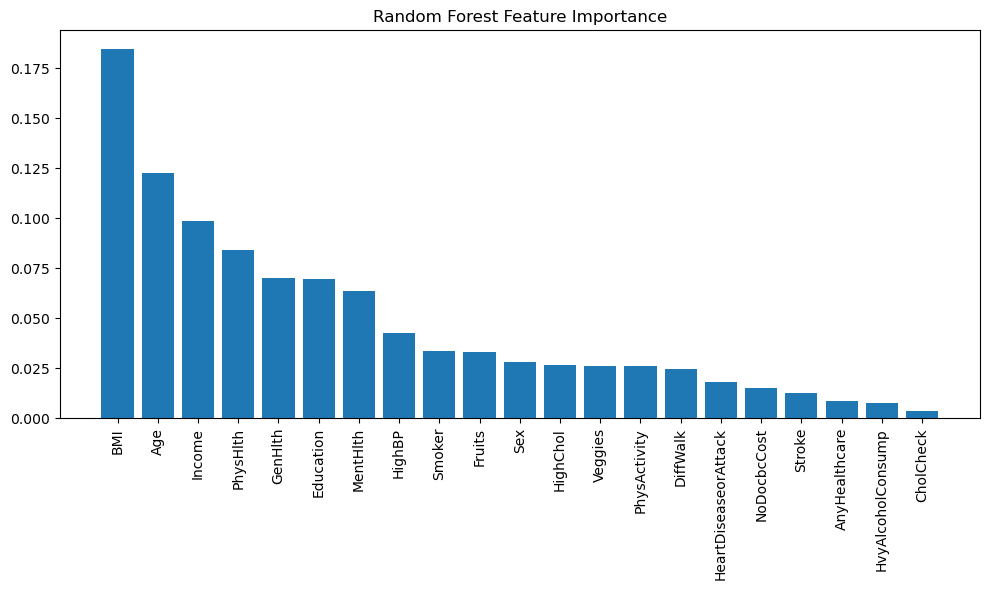

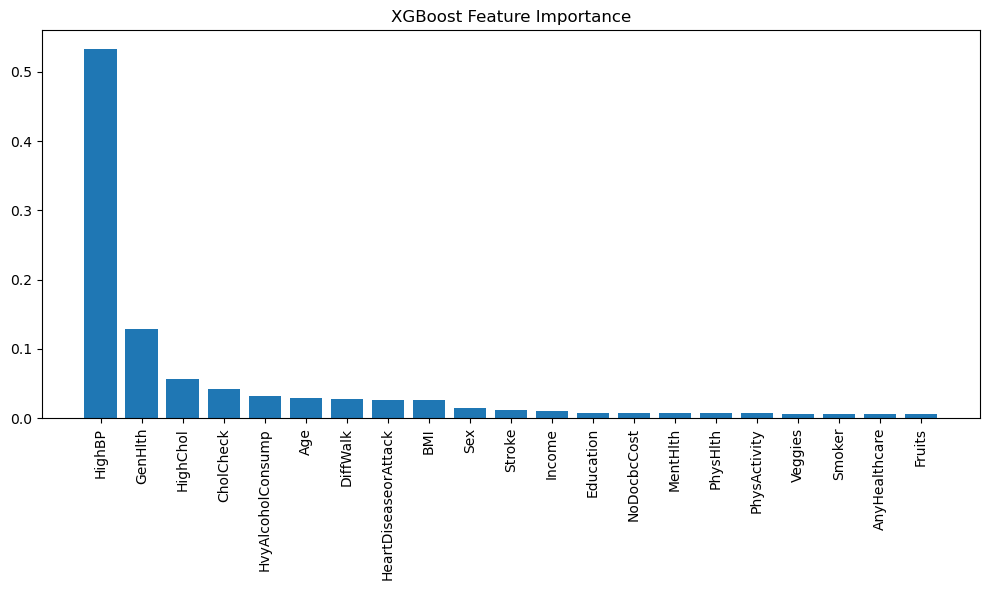

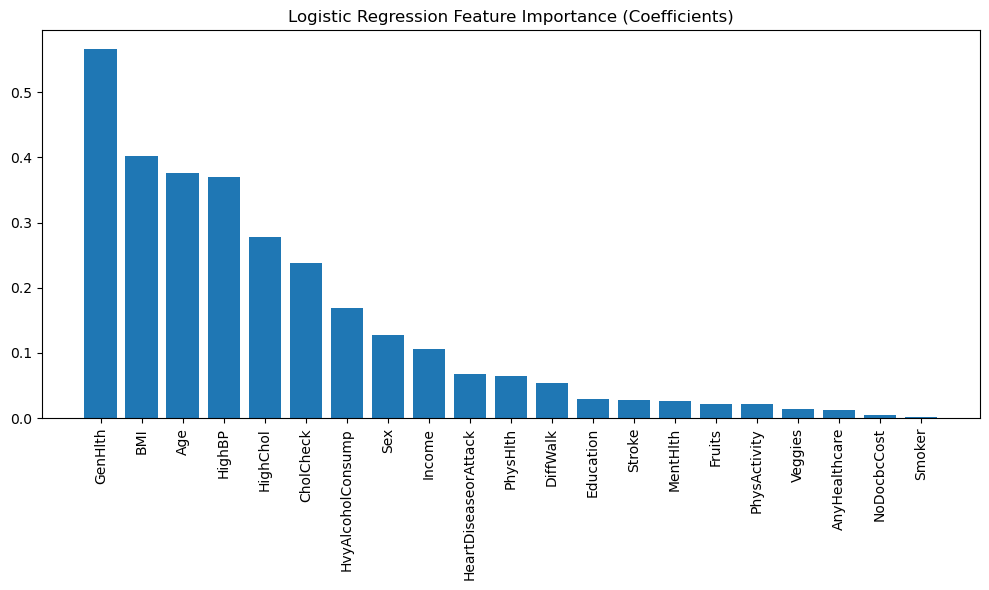

In [46]:
# Feature importance for Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10,6))
plt.title('Random Forest Feature Importance')
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Feature importance for XGBoost
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10,6))
plt.title('XGBoost Feature Importance')
plt.bar(range(X_train.shape[1]), importances_xgb[indices_xgb], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices_xgb], rotation=90)
plt.tight_layout()
plt.show()

# Feature importance for Logistic Regression (coefficients)
importances_log_reg = np.abs(log_reg.coef_[0])  # Taking absolute value for importance
indices_log_reg = np.argsort(importances_log_reg)[::-1]

plt.figure(figsize=(10,6))
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.bar(range(X_train.shape[1]), importances_log_reg[indices_log_reg], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices_log_reg], rotation=90)
plt.tight_layout()
plt.show()

2) What risk factors are most predictive of diabetes risk?

<span style="color: rgb(100, 200, 100);">
Top 5 factors for each model:<br><br>

<li>Random forest: BMI, Age, Income, PhysHlth, GenHlth<br>
<li>XGBoost: HighBP, GenHlth, HighChol, CholCheck, HvyAlcholConsump<br>
<li>Logistic regression: GenHlth, BMI, Age, HighBP, HighChol<br><br>

As we can see from our three models, they share similar factors, especially BMI, Age, and features related to cholesterol. This is perhaps not surprising, as BMI is strongly correlated with diabetes. From GOV.UK: "There is a close association between obesity and type 2 diabetes. The likelihood and severity of type 2 diabetes are closely linked with body mass index (BMI). There is a seven times greater risk of diabetes in obese people compared to those of healthy weight, with a threefold increase in risk for overweight people."<br><br>

Age is another key factor, which is expected. As people age, their metabolism tends to slow down, and diabetes is a chronic condition. Once diagnosed, individuals live with it for the rest of their lives. This means that older individuals are more likely to have diabetes, simply due to the cumulative effect over time.<br><br>

High intake of sugar increases blood pressure and cholesterol: "Studies have shown that excessive sugar intake contributes to elevated cholesterol levels" (Ayushman hospital), "The current high intake of added sugars increases obesity which, in turn, raises BP." (NIH gov).
</span>


3) Can we use a subset of the risk factors to accurately predict whether an individual
has diabetes?

<span style="color: rgb(100, 200, 100);">We now want to use a subset of the risk factors as to try to simplify our model and hopefully have a more accurate model. First we do cross validation to get a score of our current model

In [47]:
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Scores:", log_reg_cv_scores)
print("Average Logistic Regression CV Accuracy:", log_reg_cv_scores.mean())

print("Random Forest CV Scores:", rf_cv_scores)
print("Average Random Forest CV Accuracy:", rf_cv_scores.mean())

print("XGBoost CV Scores:", xgb_cv_scores)
print("Average XGBoost CV Accuracy:", xgb_cv_scores.mean())

#2min 30sec to run

Logistic Regression CV Scores: [0.86272143 0.86331272 0.86237651 0.86350982 0.86293979]
Average Logistic Regression CV Accuracy: 0.8629720512443526
Random Forest CV Scores: [0.85826209 0.86033162 0.85942004 0.8595925  0.85934266]
Average Random Forest CV Accuracy: 0.8593897821708485
XGBoost CV Scores: [0.86353446 0.86565326 0.86429821 0.86520979 0.86385138]
Average XGBoost CV Accuracy: 0.8645094180757578


<span style="color: rgb(100, 200, 100);">
We use RFE (Recursive Feature Elimination) which will recursively remove the feature with least impact until we have n features left. We select 5 features.

In [50]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Initialize RFE for each model (select 5 features to keep for all models)
rfe_log_reg = RFE(log_reg, n_features_to_select=5)
rfe_rf = RFE(rf, n_features_to_select=5)
rfe_xgb = RFE(xgb, n_features_to_select=5)

# Fit RFE on the training data for each model
rfe_log_reg.fit(X_train, y_train)
rfe_rf.fit(X_train, y_train)
rfe_xgb.fit(X_train, y_train)

# Transform the data to the selected features for each model
X_rfe_log_reg = rfe_log_reg.transform(X_train)
X_rfe_rf = rfe_rf.transform(X_train)
X_rfe_xgb = rfe_xgb.transform(X_train)

# Cross-validation to evaluate performance for each model
log_reg_scores = cross_val_score(log_reg, X_rfe_log_reg, y_train, cv=2)
rf_scores = cross_val_score(rf, X_rfe_rf, y_train, cv=2)
xgb_scores = cross_val_score(xgb, X_rfe_xgb, y_train, cv=2)

# Print the cross-validation scores and averages for each model
print("Logistic Regression accuracy with RFE-selected features:", log_reg_scores.mean())
print("Random Forest accuracy with RFE-selected features:", rf_scores.mean())
print("XGBoost accuracy with RFE-selected features:", xgb_scores.mean())


KeyboardInterrupt: 

4) What machine learning models are best for classifying the disease? Compare
models and explain why a model performed better based on the confusion matrix and
minimizing false negatives.

<span style="color: rgb(100, 200, 100);">We looked at three models:</span>
<ul style="color: rgb(100, 200, 100);">
  <li>Logistic regression</li>
  <li>Random forest</li>
  <li>XGBooster</li>
</ul>
<span style="color: rgb(100, 200, 100);">The logistic regression had the fewest false negatives</span>
